In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import seaborn as sns
import sklearn.model_selection

#bc average sirf plot ke liye kara tha bc sabke liye nhi karna tha
#aise hi hamara data kachra hua tha

In [2]:
df =pd.read_csv('GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(3192, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [5]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [6]:
df.isnull()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,False,False,False,True,True,True,True,True,True
1,False,False,False,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True
4,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
3187,False,False,False,False,False,False,False,False,False
3188,False,False,False,False,False,False,False,False,False
3189,False,False,False,False,False,False,False,False,False
3190,False,False,False,False,False,False,False,False,False


In [7]:
#ab ham phir se date and time ko convert kar lenge
df['dt'] = pd.to_datetime(df['dt'])
df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year

print(df['year'])

df.head()

0       1750
1       1750
2       1750
3       1750
4       1750
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: year, Length: 3192, dtype: int32


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,month,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,2,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,3,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,4,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,5,1750


In [8]:
def convertToDateTime(df):
    df = df.copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['month'] = df['dt'].dt.month
    df['year'] = df['dt'].dt.year
    return df

new_df = convertToDateTime(df)
new_df = new_df.drop(columns = ['month', 'dt'])
print(new_df['year'])

#new_df = new_df.set_index('year')
new_df.head()

    
    


0       1750
1       1750
2       1750
3       1750
4       1750
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: year, Length: 3192, dtype: int32


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [9]:
print("Ocean records start from:", new_df[new_df.LandAndOceanAverageTemperature.notna()].index.min())
print("Land records start from:", new_df[new_df.LandAverageTemperature.notna()].index.min())
df_cleaned = new_df[new_df.index >=1200]

Ocean records start from: 1200
Land records start from: 0


In [10]:
df_cleaned.describe()


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1932.500000
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587,47.931235
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,1850.000000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000,1891.000000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000,1932.500000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000,1974.000000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,2015.000000


In [11]:
print(df_cleaned.shape)
good_df = df_cleaned.groupby(df_cleaned['year']).mean()
good_df.head(20)


(1992, 9)


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
year,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417
1855,8.110750,0.887167,13.493167,1.331417,1.702833,1.655333,15.021083,0.291167
1856,7.995917,0.760750,13.470250,1.798250,1.525083,1.778500,14.879333,0.260167
1857,7.758167,0.751083,13.437583,2.179167,1.856833,1.591167,14.758250,0.259750
1858,8.100250,0.699750,13.683000,1.870000,2.110750,1.224333,14.881500,0.251833


In [12]:
#abhi average nikalne ke liye function likhenge and we will have fun with it yayyyyy

In [13]:

#good shit bhai 
#When you perform a groupby operation in Pandas and then apply an aggregation method like mean(),
#the column you grouped by ('year' in this case) becomes the index of the resulting DataFrame.

In [14]:
#now i will try to plot it.
#i am not comfortable with functions right now so 
#instead i will write apne aap hi
good_df.shape
good_df.describe()


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,0.473687,0.208560,0.447741,0.549759,0.614124,0.406697,0.298629,0.071441
min,7.558583,0.062083,13.081000,0.078500,1.525083,0.102500,14.740083,0.047500
25%,8.195708,0.094333,14.055917,0.139542,2.262562,0.149896,14.991208,0.062937
50%,8.540750,0.240625,14.307708,0.240125,2.734917,0.274667,15.144208,0.123625
75%,8.791250,0.341958,14.539167,0.508000,3.126833,0.437000,15.379104,0.150229
max,9.831000,0.918250,15.572667,2.619250,4.148833,1.778500,16.058583,0.316417


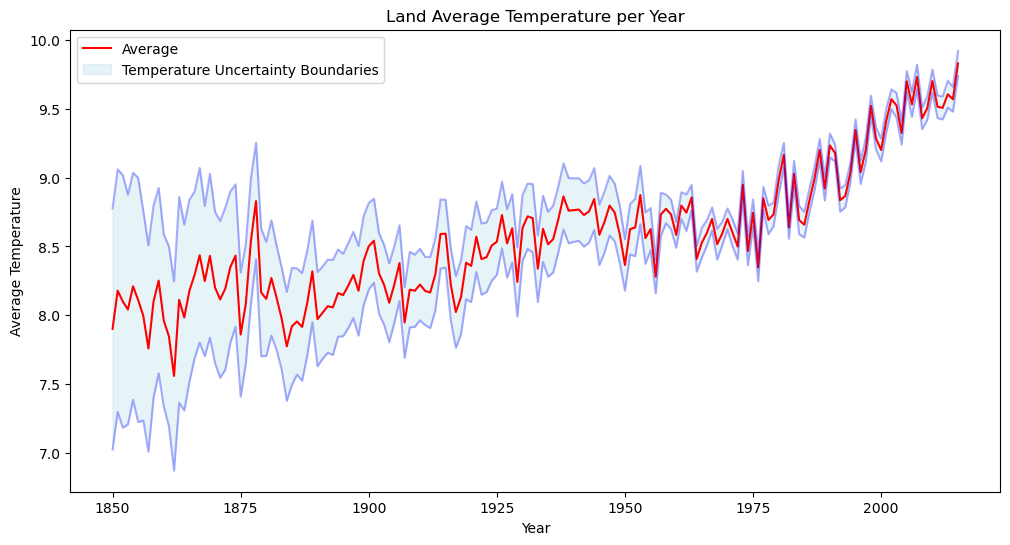

In [15]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = df
  average_per_year['lower temp'] = average_per_year[col1] - average_per_year[col2]
  average_per_year['upper temp'] = average_per_year[col1] + average_per_year[col2]

  plt.figure(figsize=(12,6))
  plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average')
  plt.plot(average_per_year.index, average_per_year['upper temp'], color='blue', alpha=0.3)
  plt.plot(average_per_year.index, average_per_year['lower temp'], color='blue', alpha=0.3)
  plt.fill_between(average_per_year.index, average_per_year['upper temp'], average_per_year['lower temp'], color='lightblue', alpha=0.3, label='Temperature Uncertainty Boundaries')
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  plt.legend(loc='best')

# Land Average Temperature
plot_average_temp(good_df,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature per Year')


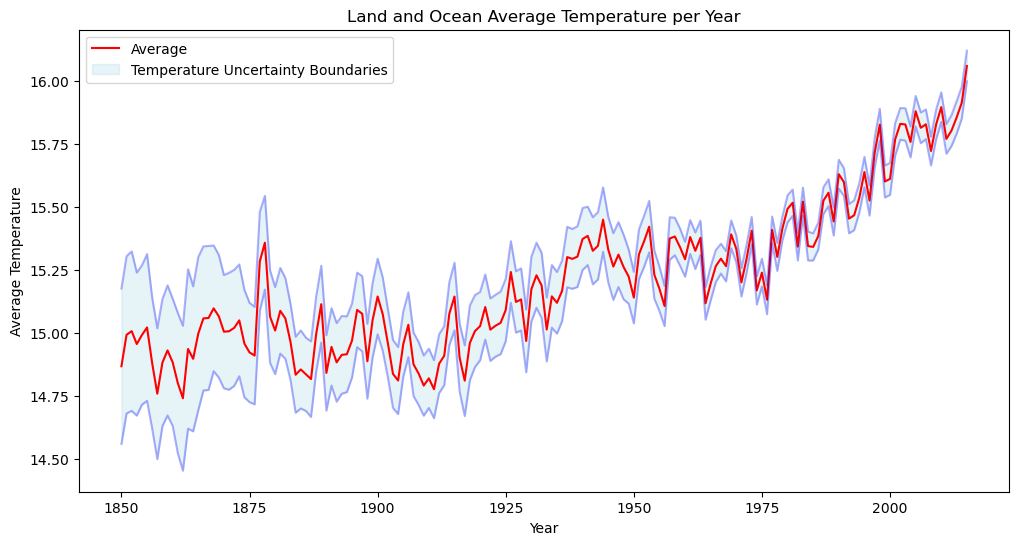

In [16]:
# Land and Ocean Average Temperature
plot_average_temp(good_df,'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty','Land and Ocean Average Temperature per Year')

In [17]:
abc_df = df_cleaned.drop(columns = ['LandMaxTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty',
               'LandAverageTemperatureUncertainty','LandMinTemperatureUncertainty'])
abc_df.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,year
1200,0.749,8.242,-3.206,12.833,1850
1201,3.071,9.970,-2.291,13.588,1850
1202,4.954,10.347,-1.905,14.043,1850
1203,7.217,12.934,1.018,14.667,1850
1204,10.004,15.655,3.811,15.507,1850


In [18]:
# Features, X
X = abc_df.drop('LandAndOceanAverageTemperature',axis=1)
# Target, Y
Y = abc_df['LandAndOceanAverageTemperature']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.25, random_state=40)
print("Size of X_train: ", X_train.shape)
print("Size of X_test: ", X_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of X_train:  (1494, 4)
Size of X_test:  (498, 4)
Size of y_train:  (1494,)
Size of y_test:  (498,)


In [20]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
ans = linear.score(X_test, y_test)
print(ans)

0.9893970192693365


In [ ]:
#THAAAAANNNNNKKKKKKKKK FFFUUUUCCCCCKKKIIINNGGG GGGOOOODDDDDDDDSSSSSS